# Breast Cancer Detection Using Classification Algorithms and Neural Networks

## Introduction

Breast cancer is one of the most common cancers affecting women worldwide. Early detection and accurate diagnosis are crucial for improving patient outcomes and survival rates. With the advent of machine learning and artificial intelligence, it is possible to develop predictive models that can assist in the early detection of breast cancer.

In this project, we aim to develop a robust model for breast cancer detection using a combination of traditional classification algorithms and advanced neural network techniques. We will use a well-known dataset from Kaggle, which contains various features related to breast cancer diagnostics.

## Problem Statement

The primary goal of this project is to build a predictive model that can accurately classify breast cancer as either malignant or benign based on diagnostic features. The dataset we are using for this purpose is the Breast Cancer Dataset available on Kaggle, which contains attributes relevant to breast cancer diagnosis.

## Approach

Our approach to solving this problem involves several steps:

1. **Data Exploration and Preprocessing**: We will begin by exploring the dataset to understand its structure, identify any missing values, and perform necessary preprocessing steps such as normalization and encoding of categorical variables.

2. **Feature Selection and Engineering**: We will analyze the features to select the most relevant ones for our model and perform any necessary feature engineering to enhance model performance.

3. **Model Building**: We will implement and compare various classification algorithms, including Logistic Regression, Decision Trees, Random Forest, and Support Vector Machines. Additionally, we will develop a Neural Network model to leverage its capability to capture complex patterns in the data.

4. **Model Evaluation and Tuning**: We will evaluate the performance of our models using appropriate metrics such as accuracy, precision, recall, and F1-score. Hyperparameter tuning will be conducted to optimize the models for better performance.

5. **Model Deployment**: Finally, we will discuss how our models can be deployed in a real-world setting to assist healthcare professionals in early detection and diagnosis of breast cancer.

## Solution and Its Impact

By developing a reliable and accurate model for breast cancer detection, our solution aims to:

- **Enhance Early Detection**: Enable healthcare providers to identify malignant cases at an early stage, leading to timely intervention and treatment.
- **Reduce Diagnostic Errors**: Assist radiologists and oncologists in making more accurate diagnoses, thus reducing the chances of misdiagnosis.
- **Improve Patient Outcomes**: Early and accurate detection can significantly improve treatment outcomes and survival rates for breast cancer patients.

## Real-Life Applicability

The model developed in this project has significant real-life applicability:

- **Clinical Decision Support**: The model can be integrated into clinical workflows to provide decision support to healthcare professionals, aiding them in interpreting diagnostic images and patient data.
- **Screening Programs**: It can be used in large-scale breast cancer screening programs to quickly and accurately classify mammograms, ensuring that high-risk patients receive prompt attention.
- **Research and Development**: The insights gained from this project can contribute to ongoing research in the field of medical diagnostics, paving the way for further advancements in AI-driven healthcare solutions.

By the end of this project, we aim to present a comprehensive analysis and a high-performing model that showcases the potential of machine learning and neural networks in transforming breast cancer detection and diagnosis.

## 0. Importing useful libraries and packages

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## 1. Data Exploration and Preprocessing

### 1.1. Data Loading

In [2]:
diagnostic_data = pd.read_csv('../Dataset/breast-cancer.csv')

In [3]:
med_data = pd.DataFrame(diagnostic_data)

### 1.2. Data Exploration

#### 1.2.1 Display basic information

In [4]:
med_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
med_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
med_data.shape

(569, 32)

In [10]:
med_data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
med_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### 1.2.2 Data Visualization

##### **Countplot**

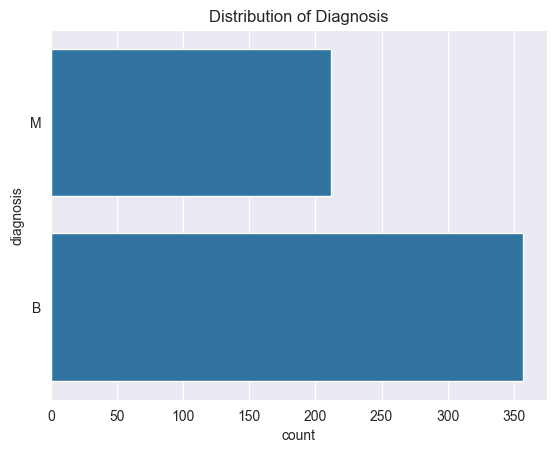

In [14]:
sns.countplot(med_data['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.show()

##### **Correlation Heatmap**

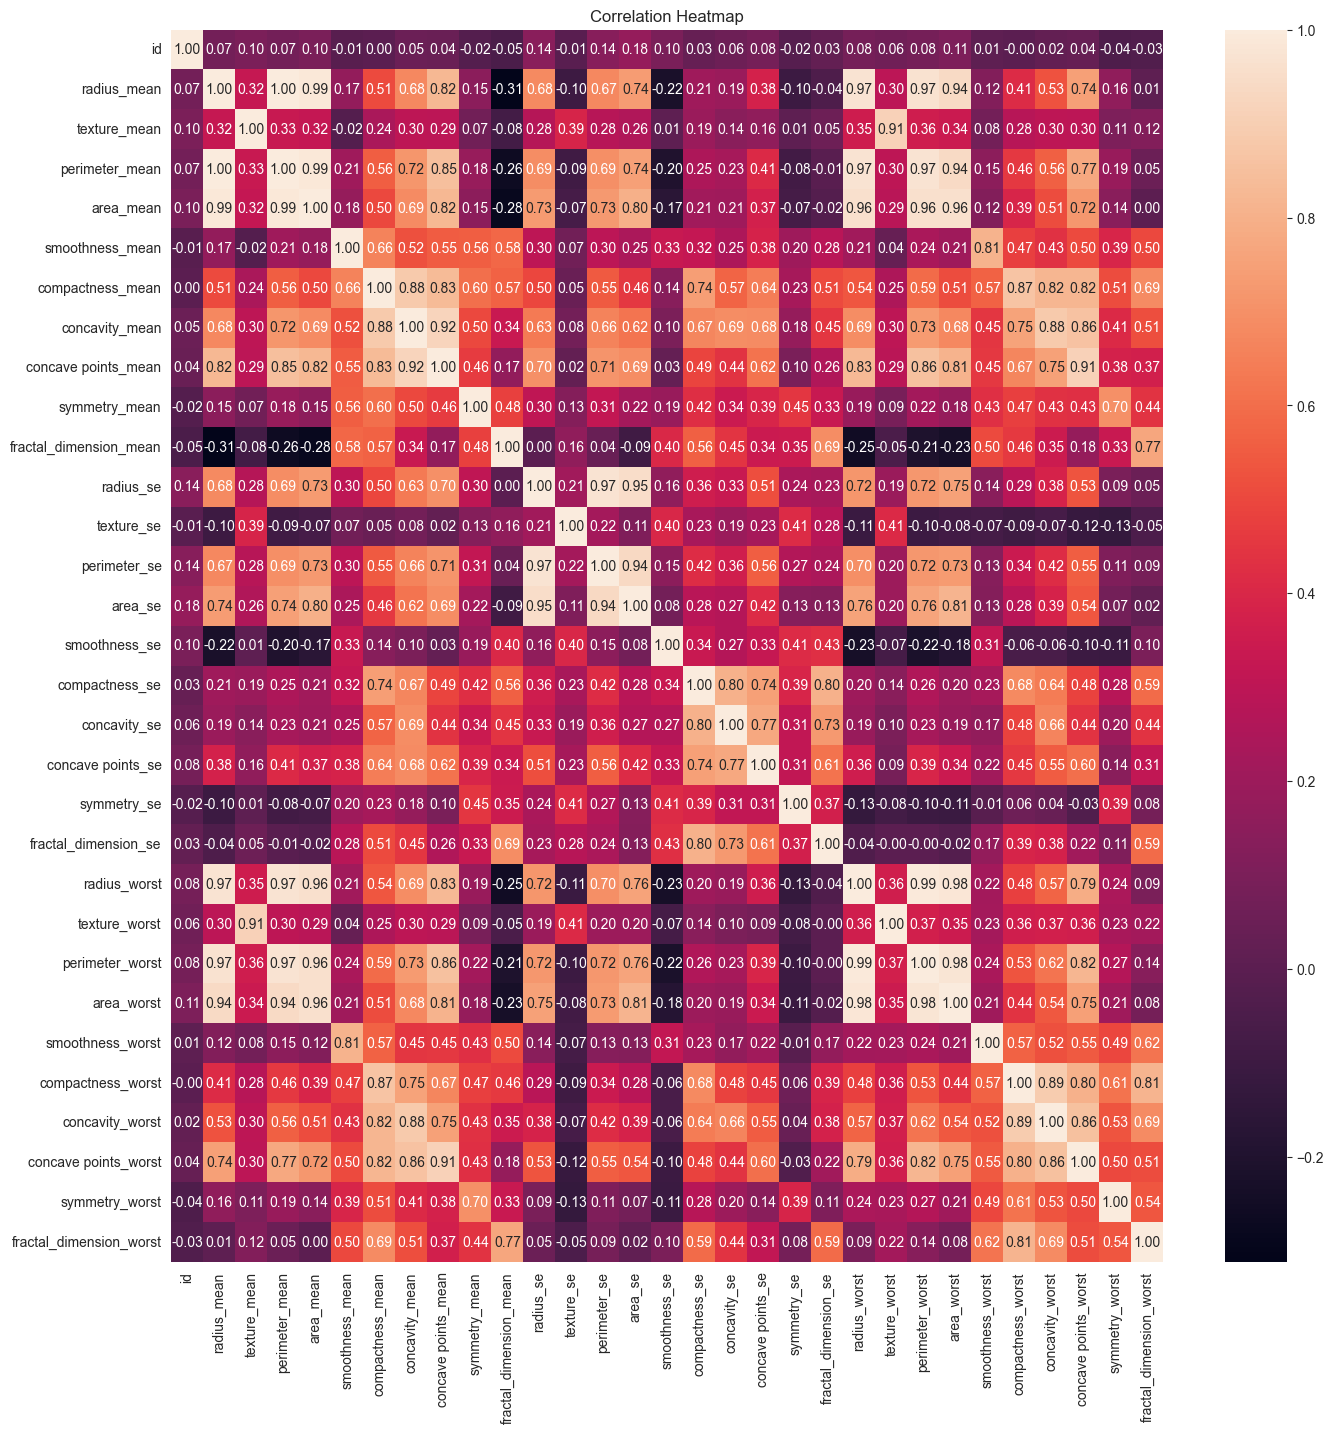

In [17]:
correlation_matrix = med_data.corr(numeric_only=True)

plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

#### 1.2.3. Categorizing and Cleaning Diagnosis Column
- **Categorizing Malignant to 1 and Benign to 0**

In [18]:
def categorize_diagnosis(value):
    if value == 'M':
        return 1
    else:
        return 0

In [20]:
med_data['diagnosis'] = med_data['diagnosis'].apply(categorize_diagnosis)

In [21]:
med_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
med_data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


## 2. Building the Model and Neural Network

### 2.0. Importing necessary libraries and packages for building the neural network

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import Sequential

### 2.1. Separating Features and Target from the dataset

In [32]:
x = med_data.drop(['diagnosis', 'id'], axis=1)
y = med_data['diagnosis']

In [33]:
x.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### 2.2. Performing Train-Test Split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [62]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [63]:
standard_scaler = StandardScaler()

In [64]:
x_train_std = standard_scaler.fit_transform(x_train)

In [65]:
x_test_std = standard_scaler.transform(x_test)

### 2.3. Building Neural Network

<img src="../Images/NN-1.svg" style="width: 400px; height: 400px"/>

#### 2.3.1. Setting up the layers

In [91]:
model = Sequential(
    [
        tf.keras.Input(shape=(30,)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=20, activation='relu', name="layer2"),
        keras.layers.Dense(units=1, activation='sigmoid', name="layer3")
    ],
    name="breast-cancer-model"
)

#### 2.3.2. Compiling the model

In [92]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

### 2.3.3. Training the model

In [94]:
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1760 - loss: 1.3856 - val_accuracy: 0.2391 - val_loss: 1.0640
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3842 - loss: 0.8377 - val_accuracy: 0.6522 - val_loss: 0.6616
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7712 - loss: 0.5334 - val_accuracy: 0.8261 - val_loss: 0.4586
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8919 - loss: 0.3766 - val_accuracy: 0.8913 - val_loss: 0.3462
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9203 - loss: 0.2843 - val_accuracy: 0.9348 - val_loss: 0.2800
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9390 - loss: 0.2277 - val_accuracy: 0.9348 - val_loss: 0.2382
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1921 - val_accuracy: 0.9348 - val_loss: 0.2105
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9621 - loss: 0.1681 - val_accuracy: 0.9565 - val_loss:

### 2.3.4. Visualizing loss and accuracy

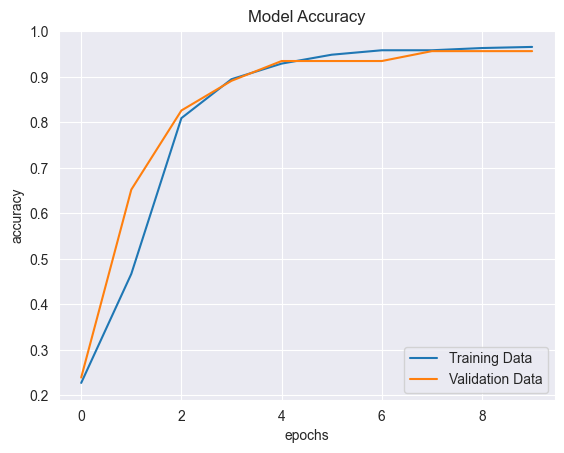

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.legend(['Training Data', 'Validation Data'], loc="lower right")
plt.show()

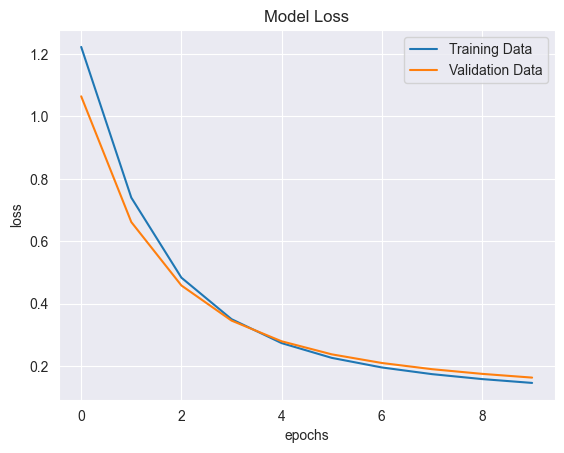

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend(['Training Data', 'Validation Data'], loc="upper right")
plt.show()

### 2.3.4. Testing our Neural Network based on the test data

In [98]:
loss, accuracy = model.evaluate(x_test_std, y_test)

print("Accuracy of the model on test data is ",accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9522 - loss: 0.1425  
Accuracy of the model on test data is  0.9561403393745422
